In [45]:
!pip install geopy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from geopy import distance

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 185.5 kB/s eta 0:00:00a 0:00:01


Exploring Orders completed data

In [16]:
df_orders = pd.read_csv('../data/nb.csv')

In [36]:
# df_orders.head()

In [19]:
df_orders.isna().sum()

Trip ID                0
Trip Origin            0
Trip Destination       0
Trip Start Time     1651
Trip End Time          1
dtype: int64

In [20]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


In [21]:
df_orders.describe()

,Trip ID
count,5.360200e+05
mean,9.910221e+05
std,3.456364e+05
min,3.919960e+05
25%,6.935610e+05
50%,9.910085e+05
75%,1.281570e+06
max,1.637709e+06


In [22]:
df_orders.shape

(536020, 5)

Lets rename the column names to make it easier when storing to a database later

In [35]:
df_orders = df_orders.rename(columns={'Trip ID': 'trip_id', 
                    'Trip Origin': 'trip_origin', 
                    'Trip Destination': 'trip_destination', 
                    'Trip Start Time': 'trip_start_time', 
                    'Trip End Time': 'trip_end_time',})
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   trip_id           536020 non-null  int64 
 1   trip_origin       536020 non-null  object
 2   trip_destination  536020 non-null  object
 3   trip_start_time   534369 non-null  object
 4   trip_end_time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


Separate the latitude and longitude from trip_origin and trip_destination columns

In [37]:
df_orders['trip_origin_lat'] = df_orders['trip_origin'].apply(lambda x: str(x).split(',')[0])
df_orders['trip_origin_long'] = df_orders['trip_origin'].apply(lambda y: str(y).split(',')[1])

In [39]:
# df_orders.head()
df_orders['trip_destn_lat'] = df_orders['trip_destination'].apply(lambda x: str(x).split(',')[0])
df_orders['trip_destn_long'] = df_orders['trip_destination'].apply(lambda y: str(y).split(',')[1])

In [41]:
df_orders.head(2)

,trip_id,trip_origin,trip_destination,trip_start_time,trip_end_time,trip_origin_lat,trip_origin_long,trip_destn_lat,trip_destn_long
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,6.508813001668548,3.37740316890347,6.650969799999999,3.3450307
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,6.4316714,3.4555375,6.4280814653326,3.4721885847586


Find the distances between trip origin and trip destination

In [46]:
df_orders['trip_distance']=df_orders.apply(lambda x:distance.distance((x['trip_origin_lat'],x['trip_origin_long']), 
(x['trip_destn_lat'],x['trip_destn_long'])).km,axis=1)

In [49]:
df_orders.head()

,trip_id,trip_origin,trip_destination,trip_start_time,trip_end_time,trip_origin_lat,trip_origin_long,trip_destn_lat,trip_destn_long,distance
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,6.508813001668548,3.37740316890347,6.650969799999999,3.3450307,16.123451
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,6.4316714,3.4555375,6.4280814653326,3.4721885847586,1.884305
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,6.631679399999999,3.3388976,6.508324099999999,3.3590397,13.822393
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,6.572757200000001,3.3677082,6.584881099999999,3.3614073,1.511034
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.984319


lets see if we can get an insight using the info on hand

<AxesSubplot:xlabel='trip_id', ylabel='distance'>

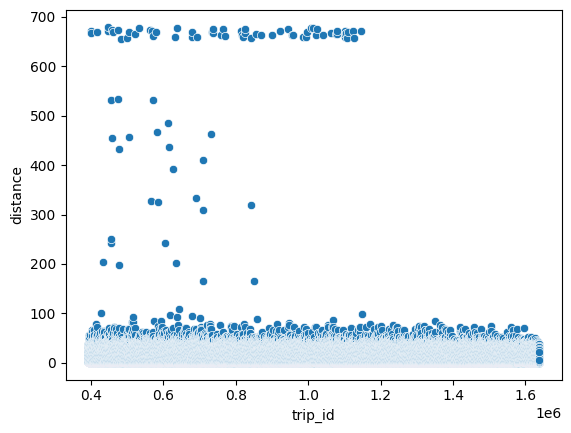

In [51]:
sns.scatterplot(y=df_orders['distance'],x=df_orders['trip_id'])